In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
( x_train, y_train ), ( x_test, y_test ) = keras.datasets.mnist.load_data( )

x_train = x_train.astype( 'float32' ) / 255.
x_test = x_test.astype( 'float32' ) / 255.

x_train = np.reshape( x_train, ( len( x_train ), 28, 28, 1 ) )
x_test = np.reshape( x_test, ( len( x_test ), 28, 28, 1 ) )

In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
input = layers.Input( shape = ( 28, 28, 1 ) )

# Encoder
x = layers.Conv2D( 16, ( 3, 3 ), activation = 'relu', padding = 'same' )( input )
x = layers.MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = layers.Conv2D( 8, ( 3, 3, ), activation = 'relu', padding = 'same' )( x )
x = layers.MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

# x = layers.Conv2D( 8, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
# encoded = layers.MaxPooling2D( ( 1, 1 ), padding = 'same' )( x )

# Decoder
# x = layers.Conv2D( 8, ( 3, 3 ), activation = 'relu', padding = 'same' )( encoded )
# x = layers.UpSampling2D( ( 1, 1 ) )( x )

x = layers.Conv2D( 8, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

x = layers.Conv2D( 16, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

decoded = layers.Conv2D( 1, ( 3, 3 ), activation = 'sigmoid', padding = 'same' )( x )

In [5]:
autoencoder = keras.models.Model( input, decoded )
autoencoder.compile( optimizer = 'adadelta', loss = 'binary_crossentropy' )

In [6]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)        

In [7]:
autoencoder.fit( x_train, x_train,
                epochs = 50, batch_size = 128, shuffle = True )

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.7069
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.7004
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6935
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6857
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6760
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6619
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.6383
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5995
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5561
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5228
Epoch 11/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4989
Epoch 12/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4764
Epoch 13/50
469/469 [====

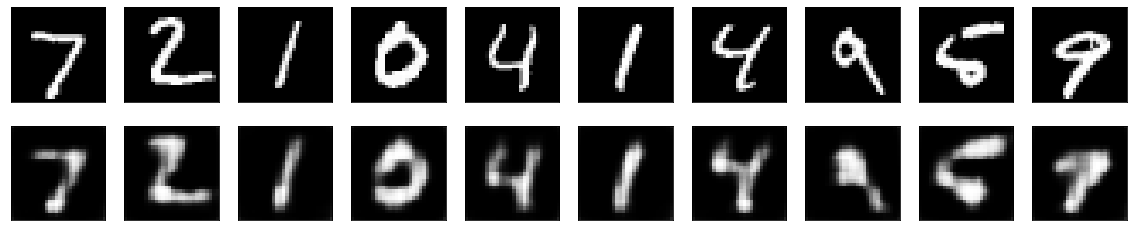

In [8]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 출력
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성본 출력
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()